In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, accuracy_score, f1_score,
    recall_score, precision_score, roc_auc_score
)
from sklearn.preprocessing import label_binarize

# Load Dataset

In [2]:
final = pd.read_csv('test_results/final_predictions.csv')

# Evaluation Metrics

Confusion Matrix:
             ads  irrelevant  rant  relevant  spam
ads         497           0     0         1     1
irrelevant    0         467     2        61     0
rant          0           0   501         8     0
relevant      0           1     0      2054     2
spam          0           0     0         0   263


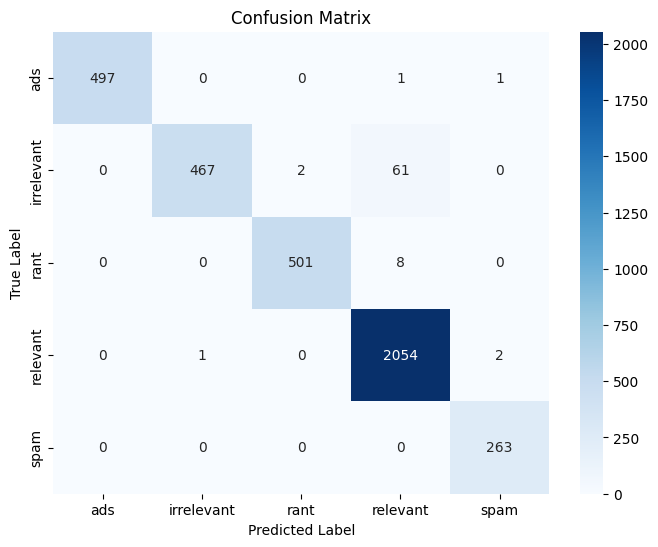

Accuracy: 0.9803

Precision per class: {'ads': 1.0, 'irrelevant': 0.9979, 'rant': 0.996, 'relevant': 0.967, 'spam': 0.9887}
Recall per class: {'ads': 0.996, 'irrelevant': 0.8811, 'rant': 0.9843, 'relevant': 0.9985, 'spam': 1.0}
F1-score per class: {'ads': 0.998, 'irrelevant': 0.9359, 'rant': 0.9901, 'relevant': 0.9825, 'spam': 0.9943}

Macro Precision: 0.9899
Macro Recall: 0.972
Macro F1-score: 0.9802
ROC-AUC (macro, multiclass): 0.997


In [3]:
# --- Define classes ---
classes = ["ads", "irrelevant", "rant", "relevant", "spam"]

# --- True and predicted labels ---
y_true = final["true_label_rule"]
y_pred = final["final_label"]

# --- Confusion Matrix ---
cm = confusion_matrix(y_true, y_pred, labels=classes)
cm_df = pd.DataFrame(cm, index=classes, columns=classes)
print("Confusion Matrix:\n", cm_df)

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

# --- Accuracy ---
accuracy = float(round(accuracy_score(y_true, y_pred), 4))
print("Accuracy:", accuracy)

# --- Precision, Recall, F1-score ---
precision_per_class = [float(round(x, 4)) for x in precision_score(y_true, y_pred, labels=classes, average=None)]
recall_per_class = [float(round(x, 4)) for x in recall_score(y_true, y_pred, labels=classes, average=None)]
f1_per_class = [float(round(x, 4)) for x in f1_score(y_true, y_pred, labels=classes, average=None)]

precision_macro = float(round(precision_score(y_true, y_pred, labels=classes, average='macro'), 4))
recall_macro = float(round(recall_score(y_true, y_pred, labels=classes, average='macro'), 4))
f1_macro = float(round(f1_score(y_true, y_pred, labels=classes, average='macro'), 4))

print("\nPrecision per class:", dict(zip(classes, precision_per_class)))
print("Recall per class:", dict(zip(classes, recall_per_class)))
print("F1-score per class:", dict(zip(classes, f1_per_class)))
print("\nMacro Precision:", precision_macro)
print("Macro Recall:", recall_macro)
print("Macro F1-score:", f1_macro)

# --- ROC-AUC (multiclass, One-vs-Rest) ---
score_cols = [f"{cls}_final" for cls in classes]  # must exist in final DataFrame
y_score = final[score_cols].values
y_true_bin = label_binarize(y_true, classes=classes)

roc_auc = float(round(roc_auc_score(y_true_bin, y_score, average='macro', multi_class='ovr'), 4))
print("ROC-AUC (macro, multiclass):", roc_auc)

# Example Reviews

In [4]:
initial = pd.read_csv('final_data/cleaned_dataset.csv')
merged = final.merge(initial, on='review_id', how='left')

In [ ]:
n = 3
examples_per_class = examples_per_class[['review', 'rating', 'business_name', 'business_desc', 'final_label']]
examples_per_class

/var/folders/xf/v125knts0p57cdp0hhtgh8y00000gn/T/ipykernel_16443/2761013383.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  examples_per_class = merged.groupby('final_label').apply(lambda x: x.sample(n=min(len(x), n))).reset_index(drop=True)


,review,rating,business_name,business_desc,final_label
0,Looking for Bar & grill? Try Proof Tavern. Inf...,3.0,Proof Tavern,['Bar & grill'],ads
1,Promo today at Insurance Specialists! Insuranc...,2.0,Insurance Specialists,"['Insurance agency', 'Auto insurance agency', ...",ads
2,Mobile Notary Reno Sparks 775-219-6482 MEGA SA...,1.0,Mobile Notary Reno Sparks 775-219-6482,"['Notary public', 'Service establishment']",ads
3,Bananas are berries; this spot is also a thing.,1.0,United States Postal Service,"['Post office', 'Logistics service', 'Money or...",irrelevant
4,Made pancakes this morning; this location is a...,5.0,Toiyabe Golf Club,"['Restaurant', 'Event venue', 'Golf club']",irrelevant
5,We are stardust and this is… a location.,3.0,Hall and Wrye Plastic Surgeons,"['Plastic surgeon', 'Laser hair removal servic...",irrelevant
6,"Heard about San Salvador Restaurant, never wen...",4.0,San Salvador Restaurant,['Salvadoran restaurant'],rant
7,This place Sports Authority Sporting Goods? Ne...,1.0,Sports Authority Sporting Goods,"['Sporting goods store', 'Sports equipment ren...",rant
8,I don’t need to visit Guadalajara to know it’s...,1.0,Guadalajara,['Mexican restaurant'],rant
9,Great food with an amazing selection of over 1...,5.0,Yard House,"['New American restaurant', 'Bar & grill', 'Br...",relevant


# Insights

# Improvements

# Scalability